### Q3 - Correlogram

In [59]:
import os
import numpy as np
from poisson import coefficient_of_variation
from load import load_data, generate_spiking_times
import matplotlib.pyplot as plt

In [12]:
file_path = os.getenv('ABS_PATH') + "/rho.dat"
spikes = load_data(file_path, int)

print("Lenght of data:",len(spikes))
print("Firing Events:", np.sum(spikes))
print(spikes[0:18])

Lenght of data: 600000
Firing Events: 53601
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [15]:
spike_train = generate_spiking_times(spikes)
spike_train[0:5]

[0.034000000000000016,
 0.044000000000000025,
 0.05000000000000003,
 0.06200000000000004,
 0.06800000000000005]

In [74]:
near_correlations = np.zeros(50)
train_length = len(spike_train)

for i, spike_time in enumerate(spike_train[:100]):
#     print("Spike", i, spike_time)
    j = i + 1

    while j < train_length:
        next_spike = spike_train[j]
        time_diff_ms = next_spike - spike_time
        
        if time_diff_ms <= 0.100:
            adj_bin = int(time_diff_ms * 1000)
            adj_bin = int(adj_bin/2)
            near_correlations[adj_bin] += 1
            print(j, time_diff_ms, adj_bin)
        else:
            break
            
        j += 1

near_correlations = np.array(near_correlations/100)
print(len(near_correlations))
near_correlations

1 0.010000000000000009 5
2 0.016000000000000014 8
3 0.028000000000000025 14
4 0.03400000000000003 17
5 0.04400000000000004 22
6 0.05400000000000005 27
7 0.062000000000000055 31
8 0.06600000000000006 33
9 0.07800000000000007 39
10 0.08800000000000008 44
11 0.09800000000000007 49
2 0.006000000000000005 3
3 0.018000000000000016 9
4 0.02400000000000002 12
5 0.03400000000000003 17
6 0.04400000000000004 22
7 0.052000000000000046 26
8 0.05600000000000005 28
9 0.06800000000000006 34
10 0.07800000000000007 39
11 0.08800000000000006 44
12 0.09800000000000007 49
3 0.01200000000000001 6
4 0.018000000000000016 9
5 0.028000000000000025 14
6 0.038000000000000034 19
7 0.04600000000000004 23
8 0.050000000000000044 25
9 0.062000000000000055 31
10 0.07200000000000006 36
11 0.08200000000000006 41
12 0.09200000000000007 46
4 0.006000000000000005 3
5 0.016000000000000014 8
6 0.026000000000000023 13
7 0.03400000000000003 17
8 0.038000000000000034 19
9 0.050000000000000044 25
10 0.06000000000000005 30
11 0.07

array([0.  , 0.03, 0.27, 0.27, 0.28, 0.21, 0.33, 0.19, 0.31, 0.17, 0.23,
       0.22, 0.16, 0.22, 0.17, 0.21, 0.14, 0.19, 0.18, 0.15, 0.16, 0.14,
       0.17, 0.14, 0.16, 0.12, 0.16, 0.09, 0.19, 0.08, 0.11, 0.13, 0.14,
       0.1 , 0.12, 0.12, 0.15, 0.1 , 0.11, 0.16, 0.07, 0.18, 0.1 , 0.13,
       0.09, 0.13, 0.09, 0.13, 0.09, 0.11])

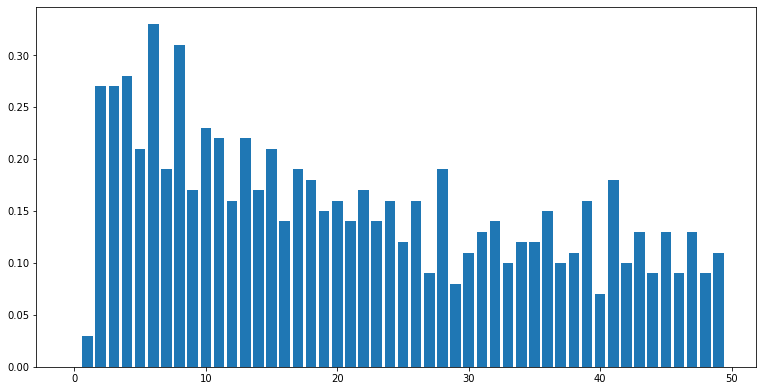

In [76]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(range(0,50), near_correlations)
plt.show()